# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

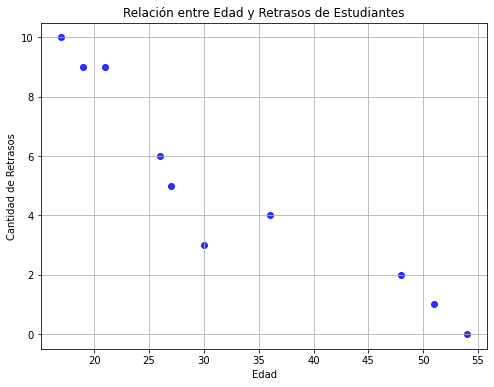

In [4]:
# Extraer las columnas de edad y retrasos
edades = student_data['Edad']
retrasos = student_data['Retrasos']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(edades, retrasos, color='blue', alpha=0.8)
plt.title('Relación entre Edad y Retrasos de Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Retrasos')
plt.grid(True)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [5]:
# Calcular la covarianza
covarianza = student_data['Edad'].cov(student_data['Retrasos'])

# Calcular la correlación
correlacion = student_data['Edad'].corr(student_data['Retrasos'])

# Imprimir los resultados
print(f'Covarianza entre Edad y Retrasos:\n{covarianza}')
print(f'Correlación entre Edad y Retrasos:\n{correlacion}')

Covarianza entre Edad y Retrasos:
-45.56666666666666
Correlación entre Edad y Retrasos:
-0.9391626886887122


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [7]:
import statsmodels.api as sm
# Definir la variable dependiente (y) y la variable independiente (X)
X = student_data['Edad']  # Variable independiente (Edad)
y = student_data['Retrasos']  # Variable dependiente (Retrasos)

# Añadir una constante a la variable independiente (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajustar el modelo a los datos
resultado = modelo.fit()

# Imprimir el resumen del modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               Retrasos   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.57e-05
Time:                        21:02:37   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Grafica tu modelo de regresión en tu diagrama de dispersión.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

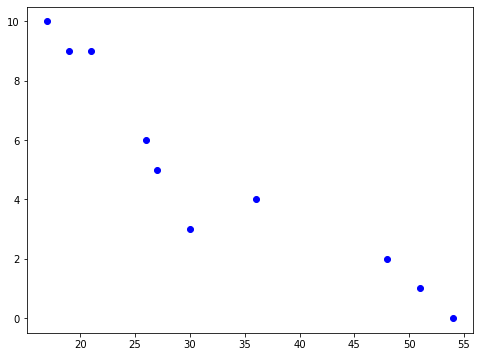

In [8]:
X = student_data['Edad']  # Variable independiente (Edad)
y = student_data['Retrasos']  # Variable dependiente (Retrasos)

# Añadir una constante a la variable independiente (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajustar el modelo a los datos
resultado = modelo.fit()

# Obtener la línea de regresión ajustada
prediccion = resultado.predict(X)

# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', label='Datos')
plt.plot(student_data['Edad'], prediccion, color='red', linewidth=2, label='Regresión')
plt.title('Regresión Lineal: Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*tu explicación aquí*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

vehicles.head()

# MPG = Miles per Gallon

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [18]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [25]:
analisis = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
correlation = analisis.corr()
correlation

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

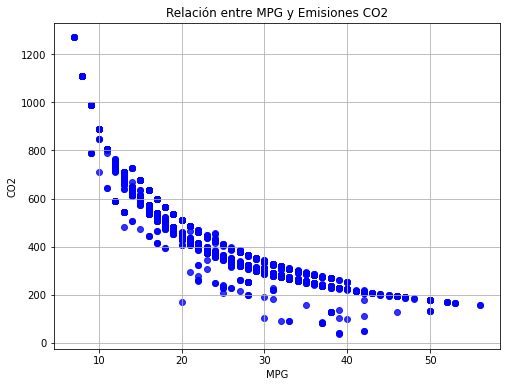

In [33]:
# Extraer las columnas de edad y retrasos
mpg = analisis['Combined MPG']
co2 = analisis['CO2 Emission Grams/Mile']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(mpg, co2, color='blue', alpha=0.8)
plt.title('Relación entre MPG y Emisiones CO2')
plt.xlabel('MPG')
plt.ylabel('CO2')
plt.grid(True)
plt.show()

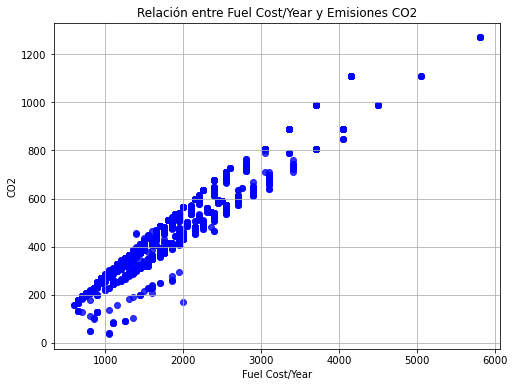

In [32]:
# Extraer las columnas de edad y retrasos
FCY = analisis['Fuel Cost/Year']
co2 = analisis['CO2 Emission Grams/Mile']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(FCY, co2, color='blue', alpha=0.8)
plt.title('Relación entre Fuel Cost/Year y Emisiones CO2')
plt.xlabel('Fuel Cost/Year')
plt.ylabel('CO2')
plt.grid(True)
plt.show()

In [ ]:
# Extraer las columnas de edad y retrasos
FBY = analisis['Fuel Barrels/Year']
co2 = analisis['CO2 Emission Grams/Mile']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(FBY, co2, color='blue', alpha=0.8)
plt.title('Relación entre Fuel Barrels/Year y Emisiones CO2')
plt.xlabel('FBY')
plt.ylabel('CO2')
plt.grid(True)
plt.show()

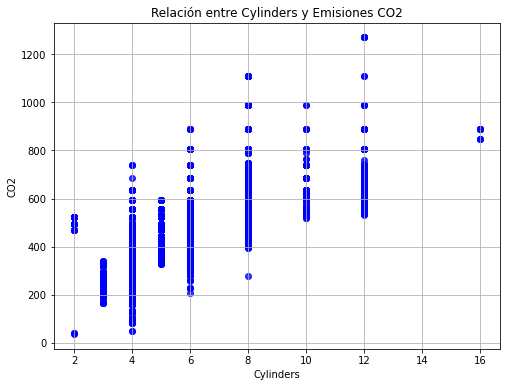

In [36]:
# Extraer las columnas de edad y retrasos
cil = analisis['Cylinders']
co2 = analisis['CO2 Emission Grams/Mile']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(cil, co2, color='blue', alpha=0.8)
plt.title('Relación entre Cylinders y Emisiones CO2')
plt.xlabel('Cylinders')
plt.ylabel('CO2')
plt.grid(True)
plt.show()

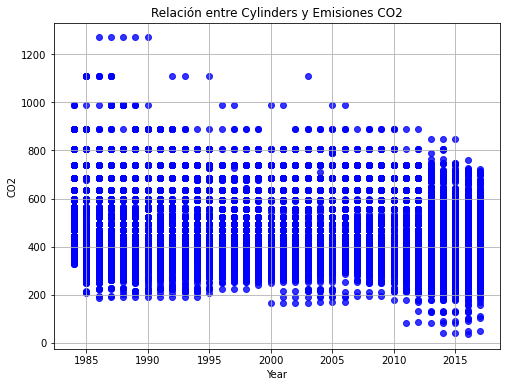

In [37]:
# Extraer las columnas de edad y retrasos
year = analisis['Year']
co2 = analisis['CO2 Emission Grams/Mile']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(year, co2, color='blue', alpha=0.8)
plt.title('Relación entre Cylinders y Emisiones CO2')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.grid(True)
plt.show()

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [38]:
asistencia = pd.DataFrame({'invitados': [1,3,4,6,8,9,11,14], 'asistentes': [1,2,4,4,5,7,8,13]})

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

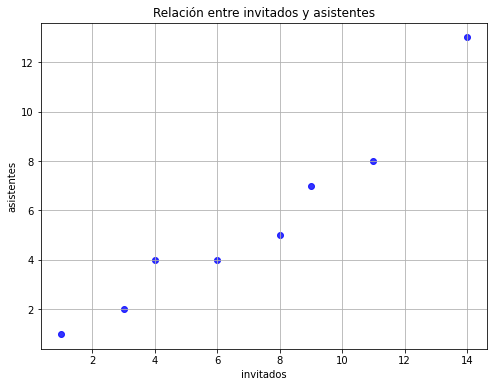

In [39]:
# Extraer las columnas de edad y retrasos
x = asistencia['invitados']
y = asistencia['asistentes']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.8)
plt.title('Relación entre invitados y asistentes')
plt.xlabel('invitados')
plt.ylabel('asistentes')
plt.grid(True)
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*